In [ ]:
# -*- coding: utf-8 -*-
"""
【教师演示用】 - 菜市场价格分析

教学目标：
1. 带领学生完成一次完整的数据分析流程：加载 -> 清洗 -> 分析 -> 可视化。
2. 掌握Pandas最核心的几个操作：读取文件、查看信息、筛选、排序、计算新列、分组。
3. 掌握Matplotlib的基础绘图方法，制作条形图。
4. 建立学生对数据分析的直观认知和兴趣。
"""

# =============================================================================
# Part 1: 准备工作 (5分钟)
# =============================================================================

# --- 教学动作：讲解原理 (2分钟) ---
# 1. 介绍我们今天的主角——Pandas库，把它比喻成数据分析领域的“瑞士军刀”。
# 2. 介绍我们将要分析的数据：一份真实的、不同批发市场的果蔬价格数据。
# 3. 提出今天的核心任务：“我们要像一个市场分析师一样，找出哪个市场的菜最贵，以及哪些菜的利润空间最大。”

# --- 教学动作：切换到代码区，开始演示 (3分钟) ---
import pandas as pd
import matplotlib.pyplot as plt

# 设置matplotlib以正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 难点与报错 ---
# 1. FileNotFoundError: 这是学生最常见的错误。
#    - 原因：CSV文件没有和Jupyter Notebook文件放在同一个文件夹下。
#    - 解决方案：课前务必强调文件存放位置。如果报错，指导学生检查文件名是否写错，或文件路径是否正确。

df_market = pd.read_csv('农产品销售数据.csv')
print("数据加载成功！")


# --- 教学动作：讲解与演示 (穿插进行) ---
# 讲解 .head() 是“看一眼数据长什么样”，.info() 是“给数据做个体检”。

print("数据前5行预览：")
df_market.head()

In [ ]:
print("数据基本信息：")
df_market.info()

数据基本信息：


NameError: name 'df_market' is not defined

In [ ]:
# =============================================================================
# Part 2: 数据清洗 (5分钟)
# =============================================================================

# --- 教学动作：讲解原理 (2分钟) ---
# 1. 讲解“数据清洗”的必要性：原始数据就像刚从地里挖出来的土豆，需要清洗才能下锅。
# 2. 告诉学生，'数据来源文件' 和 '提取时间' 这两列对我们分析价格没有帮助，需要“扔掉”。

# --- 教学动作：代码演示 (3分钟) ---

# 使用 .drop() 方法删除不需要的列
columns_to_drop = ['提取时间']
df_cleaned = df_market.drop(columns=columns_to_drop)

# 告诉学生，我们通常会把处理后的结果存到一个新的变量里（如df_cleaned），这是一个好习惯。
print("\n清洗掉无关列后，数据变整洁了：")
df_cleaned.head()


: 

In [ ]:
df_cleaned['批发市场'] == '山西省太原市河西农产品有限公司'

0       True
1       True
2       True
3       True
4       True
       ...  
743    False
744    False
745    False
746    False
747    False
Name: 批发市场, Length: 748, dtype: bool

In [ ]:
# =============================================================================
# Part 3: 核心分析与可视化 (15分钟)
# =============================================================================

# --- 教学动作：提出问题，代码解答，循环进行 ---
# 问题1：“太原河西市场今天卖的最贵的菜是什么？” (5分钟)

print("\n--- 分析任务1: 找出太原市场的最贵菜品 ---")
selected_list= df_cleaned['批发市场'] == '山西省太原市河西农产品有限公司'
# 步骤1: 筛选出太原市场的数据
taiyuan_df = df_cleaned[selected_list]

# 步骤2: 按照“大宗价”降序排序
top_taiyuan = taiyuan_df.sort_values(by='大宗价', ascending=False)

print("太原市场价格榜：")
top_taiyuan.head()

# --- 难点与报错 ---
# KeyError: 通常是列名写错，比如 '大宗价' 写成了 '大宗价 ' (多了空格)。
# 解决方法：提醒学生 .info() 的输出里可以精确复制列名。


--- 分析任务1: 找出太原市场的最贵菜品 ---
太原市场价格榜：


,品种,批发市场,最高价,最低价,大宗价,单位
13,开心果,山西省太原市河西农产品有限公司,98.0,74.0,86.0,元/公斤
11,腰果,山西省太原市河西农产品有限公司,90.0,56.0,73.0,元/公斤
12,杏仁,山西省太原市河西农产品有限公司,80.0,64.0,72.0,元/公斤
79,黑木耳,山西省太原市河西农产品有限公司,60.0,52.0,56.0,元/公斤
22,榴莲,山西省太原市河西农产品有限公司,54.0,36.0,45.0,元/公斤


In [ ]:
print("\n--- 分析任务2: 对比不同市场的平均价格 ---")
    # 使用 .groupby() 进行分组聚合，这是Pandas的精华操作
group = df_cleaned.groupby('批发市场')
market_avg_price = group['大宗价'].mean()
#market_avg_price = df_cleaned.groupby('批发市场')['大宗价'].mean()  # 对批发市场进行分组 分组之后对 大宗价 计算平均mean
market_avg_price = market_avg_price.sort_values(ascending = False)
print("各市场平均大宗价：")
market_avg_price


--- 分析任务2: 对比不同市场的平均价格 ---
各市场平均大宗价：


批发市场
长治市紫坊农产品综合交易市场有限公司      15.275676
北京朝阳区大洋路综合市场            13.858161
山西省太原市河西农产品有限公司         10.950505
上海农产品中心批发市场经营管理有限公司     10.101220
佛山中南农产品批发市场             10.046154
北京新发地农副产品批发市场信息中心        9.729359
哈尔滨哈达农副产品有限公司            9.691250
北京京丰岳各庄农副产品批发市场          9.113830
山西太原丈子头农产品物流园（原城东利民）     7.776508
广东汕头农副产品批发中心市场           6.261538
北京水屯农副产品批发市场中心           6.200000
上海市江桥批发市场经营管理有限公司        4.846154
广州江南果菜批发市场经营管理有限公司       4.524828
中俄国际农产品交易中心              4.075000
阳泉农产品批发市场有限公司            3.700000
Name: 大宗价, dtype: float64

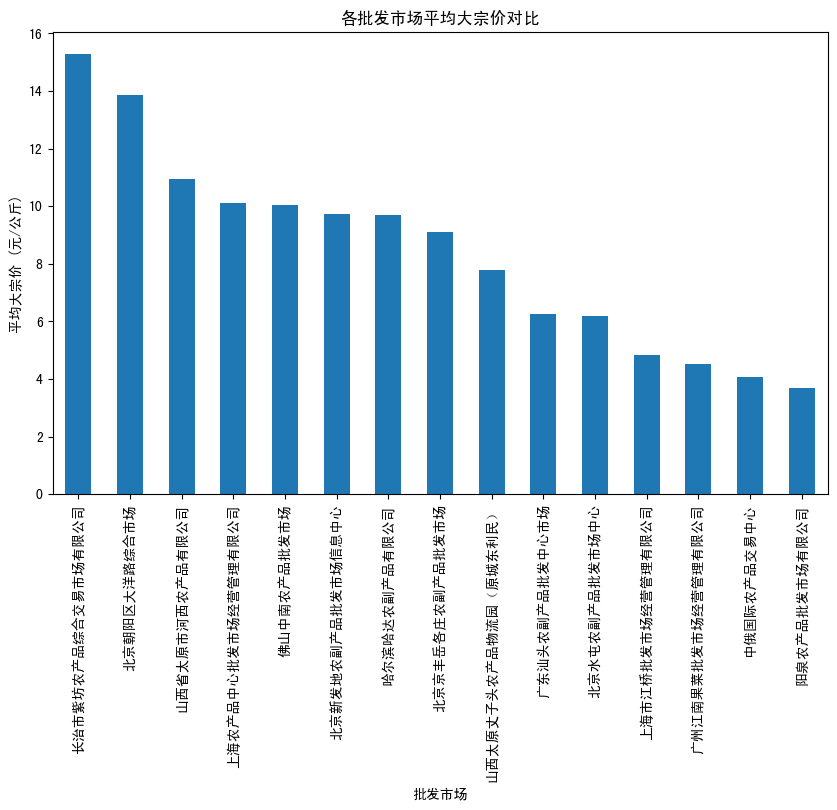

In [ ]:
market_avg_price.plot(kind='bar',figsize=(10, 6)) #   figsize=(10, 6) 指定绘图区域大小
# pandas 绘图调用的是matplotlib.pyplot    
plt.title('各批发市场平均大宗价对比')
plt.ylabel('平均大宗价 (元/公斤)')
plt.xlabel('批发市场')
plt.show()

In [ ]:
# =============================================================================
# Part 4: 总结与布置练习 (5分钟)
# =============================================================================

# --- 教学动作：总结回顾 ---
# 1. 带领学生回顾今天的流程：加载数据(.read_csv) -> 清洗数据(.drop) -> 分析数据(.sort_values, .groupby) -> 可视化(.plot)。
# 2. 强调我们是如何通过几行代码，就从一堆原始数据中发现了有价值的信息。
# 3. 宣布：“现在，你们已经掌握了数据分析师的基本武器。接下来，轮到你们亲自上阵，分析一个更具挑战性的全球农业数据了！”
# 4. 切换到学生练习文件，讲解练习要求。

In [ ]:
df_cleaned[df_cleaned['批发市场']=='长治市紫坊农产品综合交易市场有限公司'].sort_values(by='大宗价',ascending= False)

,品种,批发市场,最高价,最低价,大宗价,单位
254,黄鳝,长治市紫坊农产品综合交易市场有限公司,100.0,90.0,95.0,元/公斤
241,牛肉,长治市紫坊农产品综合交易市场有限公司,76.0,74.0,75.0,元/公斤
236,银耳,长治市紫坊农产品综合交易市场有限公司,80.0,70.0,75.0,元/公斤
242,羊肉,长治市紫坊农产品综合交易市场有限公司,70.0,68.0,69.0,元/公斤
258,黄鱼,长治市紫坊农产品综合交易市场有限公司,50.0,46.0,48.0,元/公斤
...,...,...,...,...,...,...
228,南瓜,长治市紫坊农产品综合交易市场有限公司,2.6,2.0,2.3,元/公斤
223,白萝卜,长治市紫坊农产品综合交易市场有限公司,2.6,2.0,2.3,元/公斤
207,土豆,长治市紫坊农产品综合交易市场有限公司,2.6,1.8,2.2,元/公斤
204,葱头,长治市紫坊农产品综合交易市场有限公司,2.0,1.6,1.8,元/公斤


In [ ]:
print("\n--- 分析任务3: 分析菜品价差 ---")
# 计算新列 '价差'
df_cleaned['价差'] = df_cleaned['最高价'] - df_cleaned['最低价']
    
# 按价差排序
top_spread = df_cleaned.sort_values(by='价差', ascending=False)
print("价差最大的菜品Top 10:")
top_spread.head(10)


--- 分析任务3: 分析菜品价差 ---
价差最大的菜品Top 10:


,品种,批发市场,最高价,最低价,大宗价,单位,价差
719,牛肉,上海农产品中心批发市场经营管理有限公司,110.0,60.0,80.0,元/公斤,50.0
11,腰果,山西省太原市河西农产品有限公司,90.0,56.0,73.0,元/公斤,34.0
587,羊肉,佛山中南农产品批发市场,69.1,43.7,52.8,元/公斤,25.4
720,羊肉,上海农产品中心批发市场经营管理有限公司,70.0,46.0,63.5,元/公斤,24.0
13,开心果,山西省太原市河西农产品有限公司,98.0,74.0,86.0,元/公斤,24.0
527,樱桃,广东汕头农副产品批发中心市场,60.0,40.0,50.0,元/公斤,20.0
22,榴莲,山西省太原市河西农产品有限公司,54.0,36.0,45.0,元/公斤,18.0
1,红毛丹,山西省太原市河西农产品有限公司,40.0,24.0,32.0,元/公斤,16.0
12,杏仁,山西省太原市河西农产品有限公司,80.0,64.0,72.0,元/公斤,16.0
14,核桃,山西省太原市河西农产品有限公司,30.0,16.0,23.0,元/公斤,14.0
